# Sector 2

In [1]:
import os
os.chdir('../../scripts')
import pandas as pd
import matplotlib.pyplot as plt
from post_processing import get_output
from analysis_tools_cython import *
import seaborn as sns
plt.rcParams['figure.figsize'] = [12,7]

## Import Data

In [2]:
data = get_output('../output_log/s2.txt')
#print(len(data))
metadata = pd.read_csv('/storage/astro2/phrdhx/tesslcs/sector2lookup.csv')
#print(len(metadata[metadata.Magnitude < 13]))

assert len(data) == len(metadata[metadata.Magnitude < 13]),  "Should be same length"

In [3]:
data = data[data.transit_prob == 'maybeTransit']
print(len(data), f"after maybeTransit, {round(len(data)/len(metadata[metadata.Magnitude < 13]),3)*100}% candidates remain")
data.head()

79700 after maybeTransit, 33.800000000000004% candidates remain


,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,n,chisq_gauss,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob
21,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,207089414,-6.14339,-2.96134,1374.66012,0.98370,0.00017,0.14771,29.99983,7211.81332,...,943,439.85707,447.68570,1.73172,1.76254,0.00074,0.00075,0.00061,0.00061,maybeTransit
23,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,260306012,-6.03173,-4.36631,1362.32300,1.02798,0.00075,0.44683,3.60136,3.63922,...,351,65.66034,63.69311,0.88730,0.86072,0.00074,0.00073,0.00058,0.00058,maybeTransit
30,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,8999683,-5.94205,-3.91658,1358.99571,1.04781,0.00051,0.46044,-30.00000,59.09127,...,191,89.00418,82.35583,1.11255,1.02945,0.00048,0.00047,0.00039,0.00038,maybeTransit
33,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,66465864,-4.42578,-3.45723,1361.95404,0.97254,0.00202,0.96746,3.94883,2.51735,...,333,78.27070,77.17661,0.79868,0.78752,0.00065,0.00066,0.00050,0.00052,maybeTransit
35,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,281594335,-4.54902,-4.34600,1360.63952,1.05706,0.00012,0.05273,-29.99999,1588.21355,...,270,11.01234,10.38523,0.55062,0.51926,0.00056,0.00055,0.00041,0.00039,maybeTransit


## Removing worst anomalies

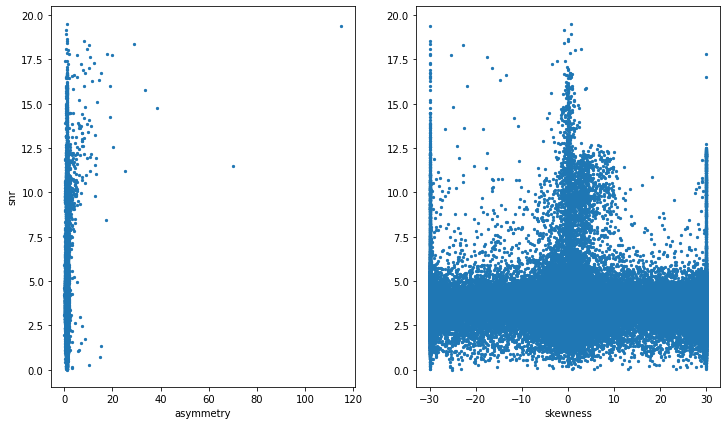

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
plt.show()

In [5]:
# for i in data.loc[abs(data.skewness >= 10) & abs(data.skewness <= 20)].path.head(): #4 x 4 grid for illustration purposes
#     lc, lc_info = import_XRPlightcurve(i,sector=6)
#     lc = lc['time','corrected flux','quality','flux error']
#     _, _ = processing(lc,lc_info=lc_info,method='median',make_plots=True)

In [6]:
data = data[(data.asym_score <= 3)].reset_index(drop=True)
data.head()

,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,n,chisq_gauss,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob
0,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,207089414,-6.14339,-2.96134,1374.66012,0.98370,0.00017,0.14771,29.99983,7211.81332,...,943,439.85707,447.68570,1.73172,1.76254,0.00074,0.00075,0.00061,0.00061,maybeTransit
1,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,260306012,-6.03173,-4.36631,1362.32300,1.02798,0.00075,0.44683,3.60136,3.63922,...,351,65.66034,63.69311,0.88730,0.86072,0.00074,0.00073,0.00058,0.00058,maybeTransit
2,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,8999683,-5.94205,-3.91658,1358.99571,1.04781,0.00051,0.46044,-30.00000,59.09127,...,191,89.00418,82.35583,1.11255,1.02945,0.00048,0.00047,0.00039,0.00038,maybeTransit
3,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,66465864,-4.42578,-3.45723,1361.95404,0.97254,0.00202,0.96746,3.94883,2.51735,...,333,78.27070,77.17661,0.79868,0.78752,0.00065,0.00066,0.00050,0.00052,maybeTransit
4,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,281594335,-4.54902,-4.34600,1360.63952,1.05706,0.00012,0.05273,-29.99999,1588.21355,...,270,11.01234,10.38523,0.55062,0.51926,0.00056,0.00055,0.00041,0.00039,maybeTransit


### Distribution of Asymmetry vs SNR, and Skewness vs SNR

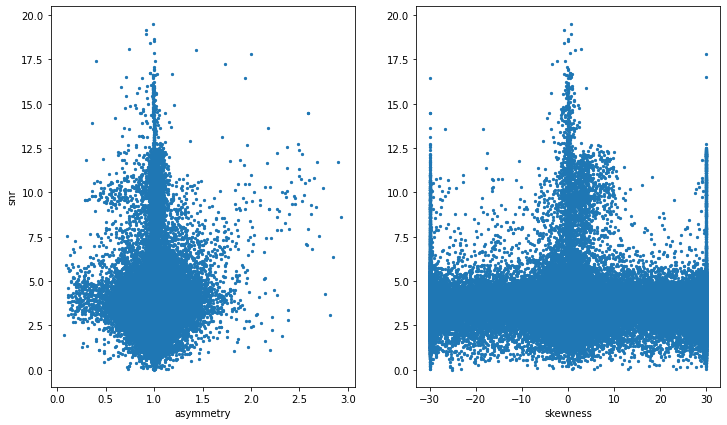

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
plt.show()

#### Histogram of time and duration

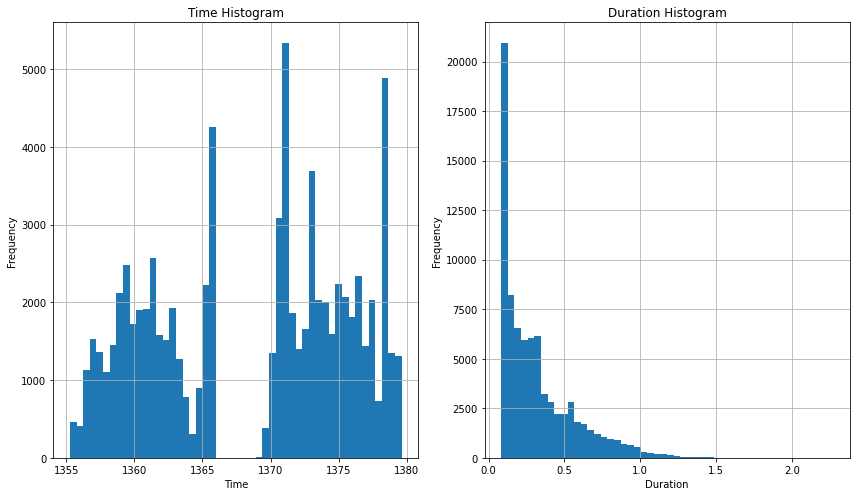

In [8]:
fig, axes = plt.subplots(1, 2)

# Plot the histogram for 'time' in the first subplot
data['time'].hist(bins=50, ax=axes[0])
axes[0].set_title('Time Histogram')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Frequency')

# Plot the histogram for 'duration' in the second subplot
data['duration'].hist(bins=50, ax=axes[1])
axes[1].set_title('Duration Histogram')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the subplots
plt.show()

#### 2D Histogram of time and duration

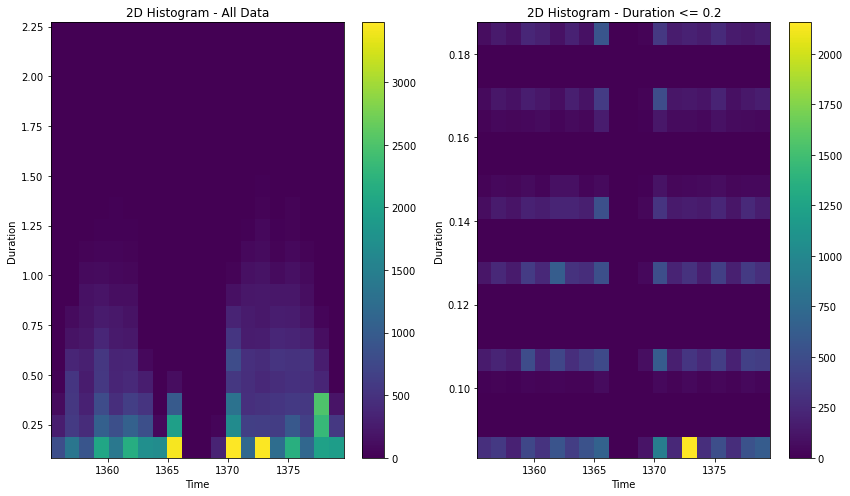

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the first hist2d on the first subplot
h1 = ax1.hist2d(data['time'], data['duration'], bins=[20, 20])
ax1.set_title('2D Histogram - All Data')
ax1.set_xlabel('Time')
ax1.set_ylabel('Duration')
plt.colorbar(h1[3], ax=ax1)

# Plot the second hist2d on the second subplot
filtered_data = data[data.duration <= 0.2]
h2 = ax2.hist2d(filtered_data['time'], filtered_data['duration'], bins=[20, 20])
ax2.set_title('2D Histogram - Duration <= 0.2')
ax2.set_xlabel('Time')
ax2.set_ylabel('Duration')
plt.colorbar(h2[3], ax=ax2)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#### Alternative visualisation

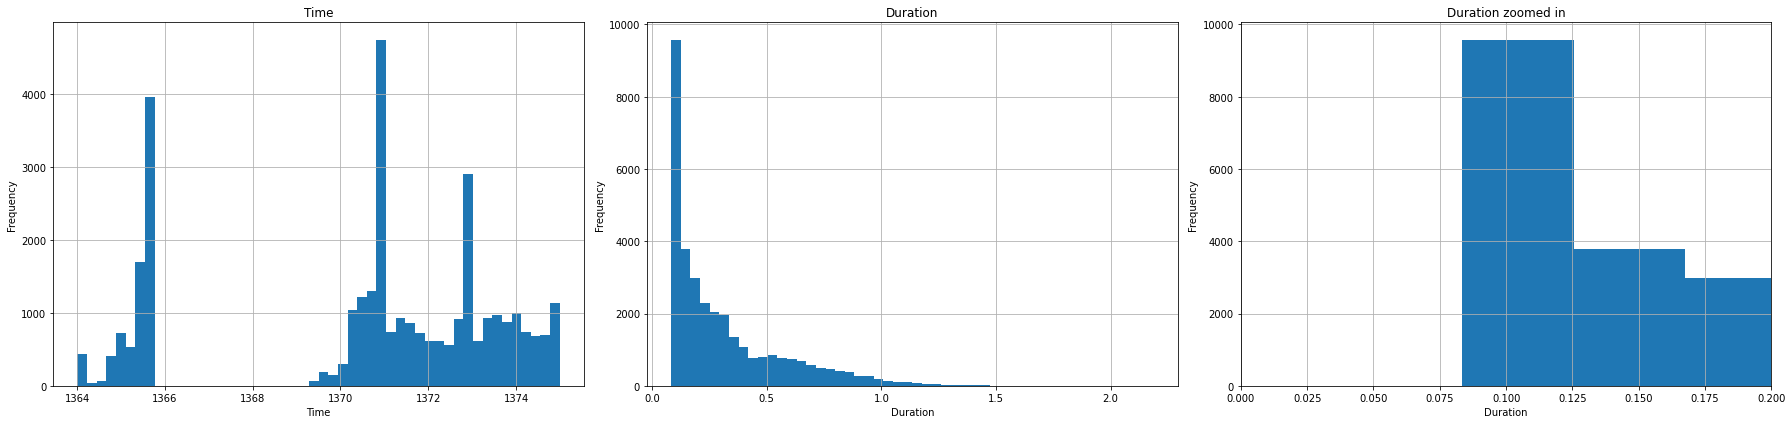

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,6))

# Plot the first histogram on the first subplot
data.loc[(data.time >= 1364) & (data.time <= 1375)].hist('time', bins=50, ax=ax1)
ax1.set_title('Time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Frequency')

# Plot the second histogram on the second subplot
data.loc[(data.time >= 1364) & (data.time <= 1375)].hist('duration', bins=50, ax=ax2)
ax2.set_title('Duration')
ax2.set_xlabel('Duration')
ax2.set_ylabel('Frequency')

data.loc[(data.time >=1364) & (data.time <= 1375)].hist('duration',bins=50,ax=ax3)
ax3.set_title('Duration zoomed in')
ax3.set_xlabel('Duration')
ax3.set_ylabel('Frequency')
ax3.set_xlim([0,0.2])

plt.tight_layout()
plt.show()

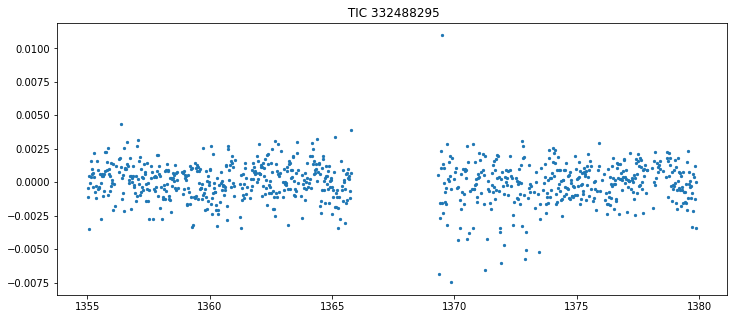

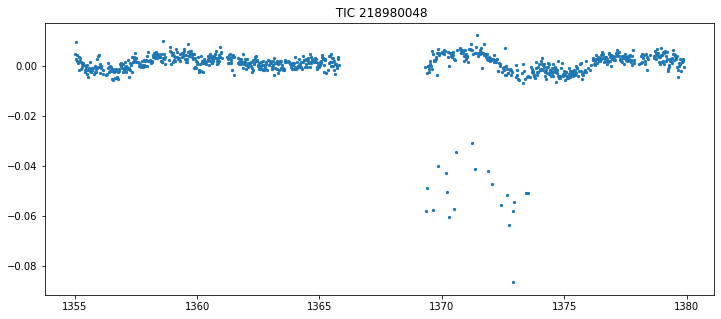

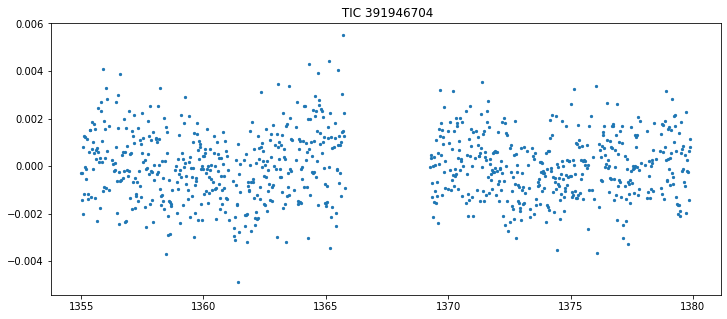

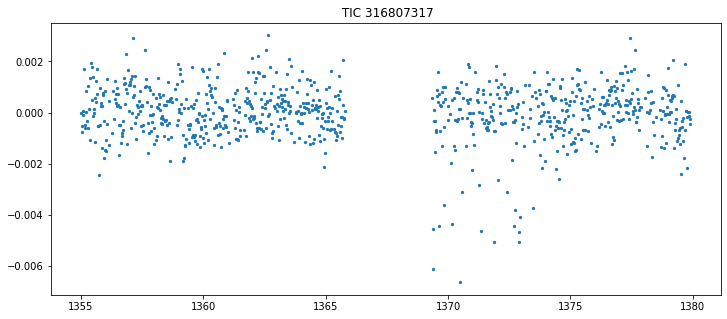

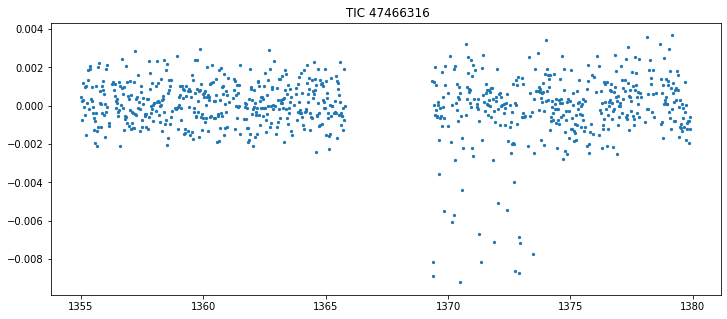

In [35]:
for i in data[(data.time >=1364) & (data.time <= 1375) & (data.duration <= 0.127)].path.tail(): #4 x 4 grid for illustration purposes
    lc, lc_info = import_XRPlightcurve(i,sector=2)
    plt.figure(figsize=(12,5))
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    plt.title(f' TIC {lc_info[0]}')
    plt.show()

There is a second spike around 0.3 days... Proven in `asym_score vs depth` plots

In [36]:
data.drop(data[(data['duration'] <= 0.15) & (data['time'] >= 1473.433) & (data['time'] <= 1473.5)].index,inplace=True)

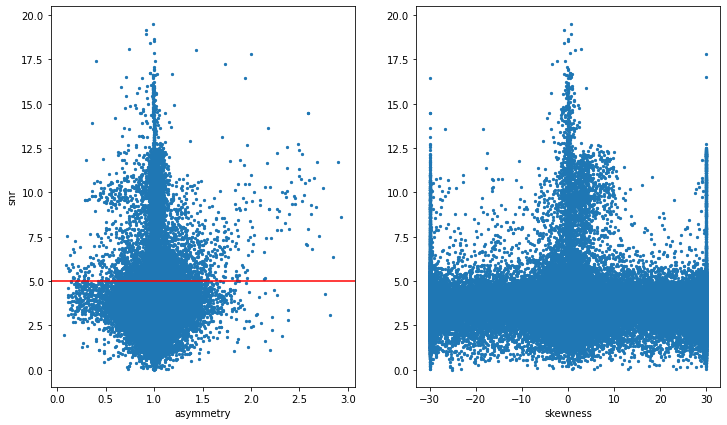

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
ax[0].axhline(5,c='red')

plt.show()

---

## SNR cut

In [38]:
data_new = data[abs(data.snr) >= 5].reset_index(drop=True)

In [39]:
len(data_new[data_new.asym_score <= 0.2])

15

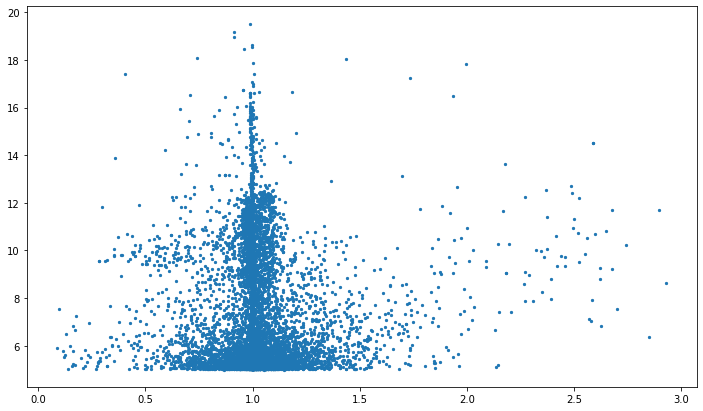

In [40]:
plt.scatter(data_new['asym_score'],abs(data_new.snr),s=5)

In [41]:
# for i in data.loc[abs(data.asym_score >= 1) & abs(data.asym_score <= 1.2)].path.head(): #4 x 4 grid for illustration purposes
#     lc, lc_info = import_XRPlightcurve(i,sector=6)
#     lc = lc['time','corrected flux','quality','flux error']
#     _, _ = processing(lc,lc_info=lc_info,method='median',make_plots=True)

---
## Other property cuts

### Import EB catalogue

In [42]:
ebs = pd.read_csv('../eb_cat.txt')
tois = pd.read_csv('../exofop_tess_tois.csv')

tois = tois.reset_index()
tois = tois['level_0'][1:]
tois = tois.values.astype(int)



In [43]:
data_new

,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,n,chisq_gauss,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob
0,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,339891928,-8.48114,-5.17001,1360.86395,0.83691,0.00120,0.31983,4.56339,2.52037,...,281,59.73915,51.00702,1.06677,0.91084,0.00082,0.00090,0.00060,0.00071,maybeTransit
1,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,278726206,-7.35722,-5.13981,1361.42681,1.63731,0.00032,0.08053,-30.00000,803.98461,...,308,25.94749,16.71814,0.81086,0.52244,0.00059,0.00046,0.00036,0.00029,maybeTransit
2,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,155540712,-9.06321,-7.94460,1370.24539,1.13221,0.00035,0.06174,20.75817,855.53379,...,731,225.08007,200.79813,11.25400,10.03991,0.00218,0.00205,0.00156,0.00145,maybeTransit
3,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,219343419,-9.08928,-7.88590,1359.63975,1.00004,0.00893,0.05615,1.11814,2.31860,...,222,33.95438,33.86531,1.06107,1.05829,0.01764,0.01764,0.01391,0.01396,maybeTransit
4,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,434096975,-6.27809,-5.70071,1363.78752,1.04025,0.00021,0.11861,20.31325,126.04793,...,421,34.88683,33.66248,0.91807,0.88585,0.00067,0.00065,0.00051,0.00051,maybeTransit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7215,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,2052161156,-6.26269,-5.16605,1370.99581,0.98717,0.00014,0.14414,19.99547,194.57317,...,767,25.11821,24.78678,0.66101,0.65228,0.00028,0.00028,0.00021,0.00022,maybeTransit
7216,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,150062328,-13.17349,-8.98182,1377.32340,1.08211,0.00103,0.10103,-16.36590,52.96916,...,1071,18.37713,12.82851,0.70681,0.49340,0.00093,0.00090,0.00073,0.00074,maybeTransit
7217,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,279319011,-12.63159,-7.10826,1365.42659,0.98181,0.00196,0.11921,0.00168,331361.81785,...,500,70.17094,68.97275,1.03193,1.01431,0.00182,0.00184,0.00122,0.00118,maybeTransit
7218,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,316807317,-8.72426,-7.67458,1372.89113,0.99148,0.00036,0.02965,0.80386,6.51147,...,858,42.07778,41.90866,2.10389,2.09543,0.00133,0.00133,0.00076,0.00077,maybeTransit


In [44]:
ebs_found = data_new[data_new['TIC_ID'].isin(ebs['ID'])]
tois_found =  data_new[data_new['TIC_ID'].isin(tois)]

In [45]:
# Step 1: Create a boolean mask
data_new['is_eb'] = data_new['TIC_ID'].isin(ebs['ID'])
data_new['is_toi'] = data_new['TIC_ID'].isin(tois)

In [46]:
log_peak_power = np.log10(data_new['peak_lspower'])
log_depth = np.log10(abs(data_new['depth']))

In [58]:
len(ebs_found) / len(data_new)

0.11537396121883657

In [61]:
len(tois_found) / len(data_new)

0.011911357340720222

In [62]:
len(ebs_found + tois_found) / len(data_new)

0.11952908587257617

### Duration vs depth

In [48]:
frac_dur = data_new.duration[(data_new.is_eb == False) & (data_new.is_toi == False)]
frac_depth = data_new.depth[(data_new.is_eb == False) & (data_new.is_toi == False)]

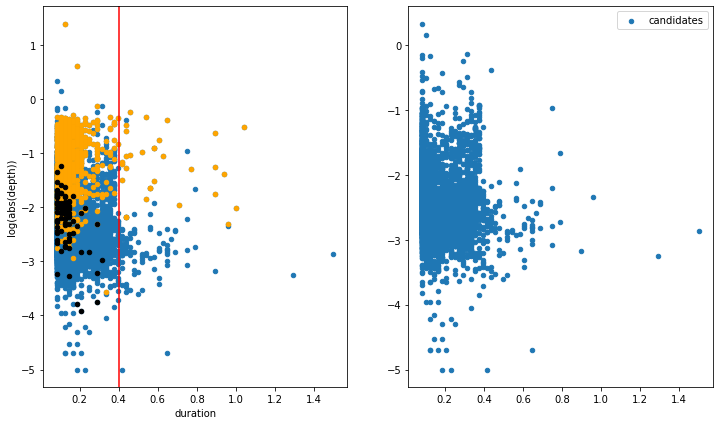

In [49]:
fig, ax = plt.subplots(ncols=2)

ax[0].scatter(data_new.duration,log_depth,s=20,label='candidates',zorder=1)
ax[0].scatter(ebs_found.duration,np.log10(abs(ebs_found['depth'])),c='orange',s=20,label='ebs')
ax[0].scatter(tois_found.duration,np.log10(abs(tois_found['depth'])),c='black',s=20,label='tois')

ax[1].scatter(frac_dur,np.log10(abs(frac_depth)),s=20,label='candidates',zorder=1)
#ax[1].scatter(tois_found.duration,np.log10(abs(tois_found['depth'])),c='black',s=20,label='tois')



ax[0].set_xlabel('duration')
ax[0].set_ylabel('log(abs(depth))')
ax[0].axvline(0.4,c='red')

plt.legend()

### Duration vs Peak_lspower

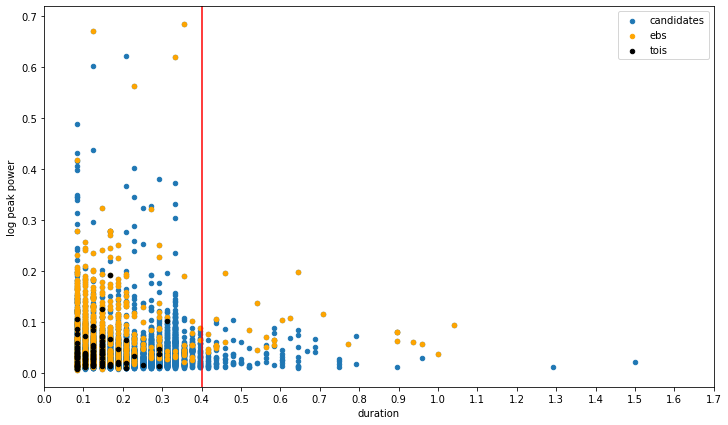

In [50]:
plt.scatter(data_new.duration,data_new.peak_lspower,s=20,label='candidates')
plt.scatter(ebs_found.duration,ebs_found.peak_lspower,c='orange',s=20,label='ebs')
plt.scatter(tois_found.duration,tois_found.peak_lspower,c='black',s=20,label='tois')

plt.xticks(np.arange(0,1.75,0.1))
plt.xlabel('duration')
plt.ylabel('log peak power')
plt.axvline(0.4,c='red')
plt.legend()

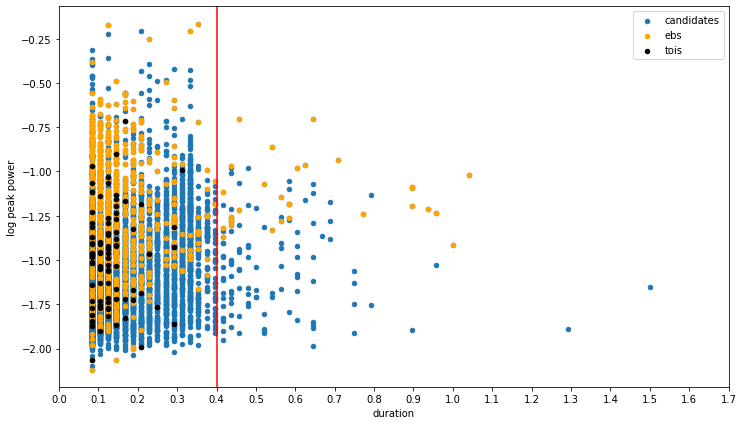

In [51]:
plt.scatter(data_new.duration,log_peak_power,s=20,label='candidates')
plt.scatter(ebs_found.duration,np.log10(ebs_found['peak_lspower']),c='orange',s=20,label='ebs')
plt.scatter(tois_found.duration,np.log10(tois_found['peak_lspower']),c='black',s=20,label='tois')

plt.xticks(np.arange(0,1.75,0.1))
plt.xlabel('duration')
plt.ylabel('log peak power')
plt.axvline(0.4,c='red')
plt.legend()

In [52]:
crossref_tot = (ebs_found.duration) + (tois_found.duration) / data_new.duration
crosref_ebs = (ebs_found.duration) / data_new.duration
cross_ref_toi = (tois_found.duration) / data_new.duration

### duration vs SNR

Text(0, 0.5, 'snr')

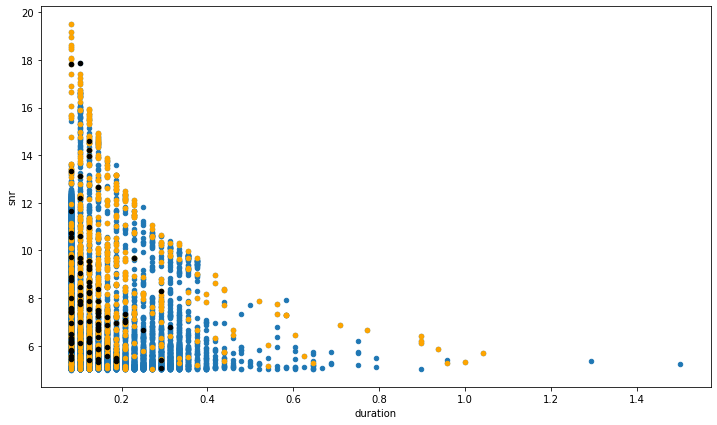

In [53]:
plt.scatter(data_new.duration,abs(data_new.snr),s=20,label='candidates')
plt.scatter(ebs_found.duration,abs(ebs_found.snr),c='orange',s=20,label='ebs')
plt.scatter(tois_found.duration,abs(tois_found.snr),c='black',s=20,label='tois')
plt.xlabel('duration')
plt.ylabel('snr')

### asymmetry vs depth

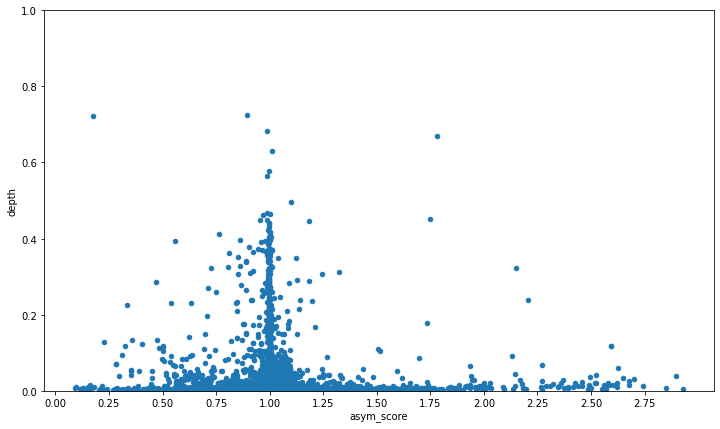

In [54]:
plt.scatter(data_new.asym_score,abs(data_new.depth),s=20,label='candidates')
plt.ylim([0,1])
plt.xlabel('asym_score')
plt.ylabel('depth')
plt.xticks(np.arange(0,3,0.25))
plt.show()

In [55]:
test = data_new[(data_new.asym_score >=0.75) & (data_new.asym_score <= 0.85)]

#### Explore spike at ~0.8

In [32]:
for i in data_new[(data_new.asym_score >=0.75) & (data_new.asym_score <= 0.85)].path.head(2): #4 x 4 grid for illustration purposes
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    plt.figure(figsize=(12,5))
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    plt.title(f' TIC {lc_info[0]}')
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_11_12/tesslc_144045982.pkl'

### Spike at `asym_score ~ 1`

Expected. But nevertheless, let's see

759


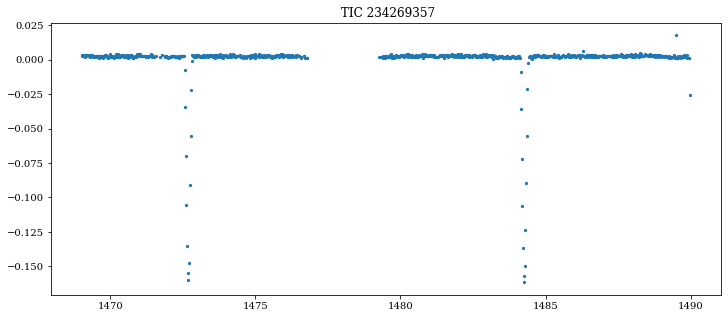

759


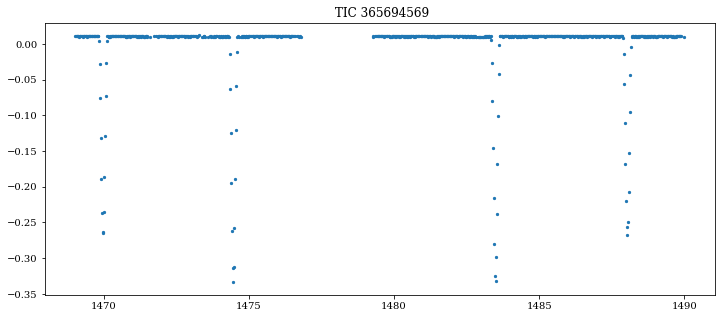

In [32]:
for i in data_new[(data_new.asym_score >=0.9) & (data_new.asym_score <= 1) & (abs(data_new.depth) >= 0.1)].path.head(2): #4 x 4 grid for illustration purposes
    print(len(data_new[(data_new.asym_score >=0.9) & (data_new.asym_score <= 1) & (abs(data_new.depth) >= 0.1)]))
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    plt.figure(figsize=(12,5))
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    plt.title(f' TIC {lc_info[0]}')
    plt.show()

### Make cut on 0.4 day duration

In [33]:
data_new.drop(data_new[data_new['duration'] <= 0.4].index,inplace=True)

In [34]:
data_new.head()

,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob,is_eb,is_toi
9,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_10...,159736204,-8.98760,-6.00222,1342.64120,0.99991,0.00029,0.13958,-0.47192,5.79456,...,130.47084,0.97380,0.97366,0.00029,0.00029,0.00023,0.00023,maybeTransit,False,False
20,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_10...,38574928,-8.32932,-5.35867,1346.74108,1.02276,0.00027,0.43270,29.99898,65.23645,...,171.79706,1.04277,1.01057,0.00032,0.00031,0.00021,0.00021,maybeTransit,False,False
57,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_10...,425904899,-9.00914,-5.00717,1338.11883,1.02037,0.00041,0.28145,-4.90106,4.33500,...,281.57115,1.92822,1.85244,0.00046,0.00046,0.00030,0.00031,maybeTransit,False,False
77,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_11...,177164215,-12.38486,-5.86620,1337.32340,1.21678,0.00112,0.41067,29.99957,36.75048,...,232.83216,1.48351,1.20017,0.00079,0.00072,0.00055,0.00051,maybeTransit,False,False
93,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_10...,159833832,-29.99829,-7.95282,1342.72461,1.24623,0.00432,0.29287,-4.55648,1.18453,...,1729.43920,14.50092,10.94582,0.00155,0.00139,0.00088,0.00090,maybeTransit,False,False


### asym_score vs depth
depth spike at 0.3 days gone. 
- Most if not all the failed lightcurves should have been cut now.

In [35]:
from matplotlib.colors import ListedColormap

In [36]:
bin_colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#b15928', '#a6cee3', '#b2df8a']

# Create a ListedColormap using the specific colors
custom_cmap = ListedColormap(bin_colors)

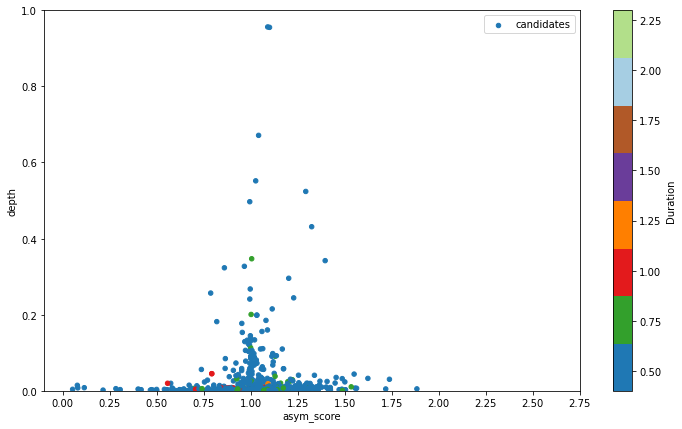

In [37]:
bin_interval = 0.1
bins = np.arange(0, np.max(data_new.duration) + bin_interval, bin_interval)

# Use np.digitize to map duration values to their corresponding bins
duration_binned = bins[np.digitize(data_new.duration, bins) - 1]


plt.scatter(data_new.asym_score,abs(data_new.depth),c=duration_binned,s=20,label='candidates',cmap=custom_cmap)
plt.ylim([0,1])
plt.xlim([-0.1,2])
plt.xlabel('asym_score')
plt.ylabel('depth')
plt.xticks(np.arange(0,3,0.25))
plt.legend()
plt.colorbar(label='Duration')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c0c050490>]],
      dtype=object)

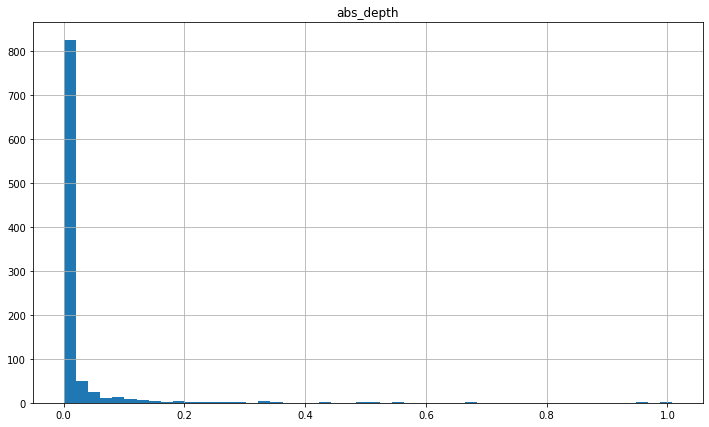

In [38]:
data_new['abs_depth'] = abs(data_new.depth)
data_new.hist('abs_depth',bins=50)

Most are low amplitude transits

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c0bda4410>]],
      dtype=object)

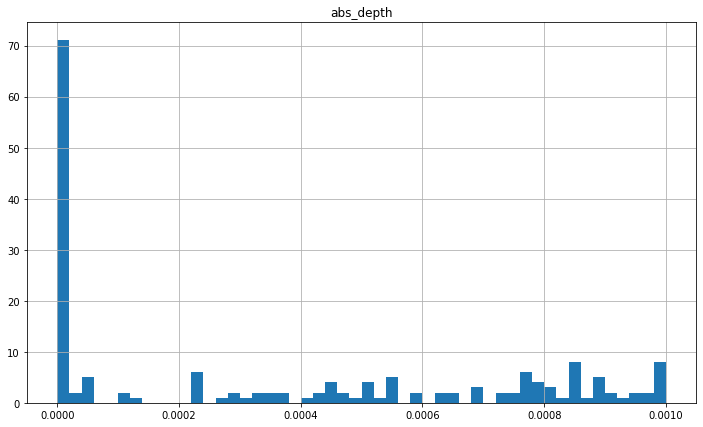

In [39]:
data_new[data_new.abs_depth <= 0.001].hist('abs_depth',bins=50)

In [40]:
data_new[data_new.abs_depth <= 0.001]

,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob,is_eb,is_toi,abs_depth
9,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_10...,159736204,-8.98760,-6.00222,1342.64120,0.99991,0.00029,0.13958,-0.47192,5.794560e+00,...,0.97380,0.97366,0.00029,0.00029,0.00023,0.00023,maybeTransit,False,False,0.00088
20,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_10...,38574928,-8.32932,-5.35867,1346.74108,1.02276,0.00027,0.43270,29.99898,6.523645e+01,...,1.04277,1.01057,0.00032,0.00031,0.00021,0.00021,maybeTransit,False,False,0.00049
218,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_10...,317089102,-9.97022,-5.86897,1346.11760,1.20102,0.00088,0.83271,-30.00000,4.248226e+01,...,3.14990,2.61469,0.00054,0.00050,0.00040,0.00035,maybeTransit,False,False,0.00084
256,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_10...,294152177,-9.51430,-5.11856,1332.69752,0.96136,0.00071,0.28720,-0.00273,1.244992e+05,...,0.91539,0.88848,0.00040,0.00041,0.00031,0.00032,maybeTransit,False,False,0.00099
280,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_11...,260043508,-10.51548,-5.21305,1345.11467,0.85747,0.00000,11.93760,29.99743,1.361002e+06,...,1.46266,1.70563,0.00112,0.00121,0.00090,0.00097,maybeTransit,False,False,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11026,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_9_...,350953880,-8.86580,-5.03372,1333.96853,1.13283,0.00043,0.47377,29.99985,4.159655e+01,...,3.64113,3.19717,0.00036,0.00033,0.00029,0.00027,maybeTransit,False,False,0.00072
11119,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_12...,358336550,-6.43213,-5.06215,1345.19855,0.88899,0.00039,0.50446,26.83769,1.335819e+02,...,0.79865,0.89365,0.00098,0.00104,0.00073,0.00078,maybeTransit,False,False,0.00062
11183,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_9_...,289917327,-9.85713,-5.20404,1344.18333,0.85410,0.00002,0.40470,-22.85381,2.720668e+08,...,871.10573,1076.05463,0.00452,0.00489,0.00325,0.00352,maybeTransit,False,False,0.00003
11228,/tmp/tess/tesslcs_sector_1_104/tesslcs_tmag_9_...,372851851,-13.54777,-5.07533,1345.71892,1.48716,0.00139,1.39862,-25.91914,1.593364e+01,...,2.42768,1.60486,0.00033,0.00027,0.00026,0.00021,maybeTransit,False,False,0.00079


In [41]:
for i in data_new[data_new.asym_score <= 0.01].path.head(10): #4 x 4 grid for illustration purposes
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    lc = lc['time','corrected flux','quality','flux error']
    results, _ = processing(lc,lc_info=lc_info,method='median',make_plots=True)
    #plt.figure(figsize=(12,5))
    #plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    #plt.title(f' TIC {lc_info[0]}')
    #plt.show()

### Make cut at `> 0.1` and `< 0` depth

In [42]:
data_new.drop(data_new[(data_new['abs_depth'] >= 0.1)].index,inplace=True)

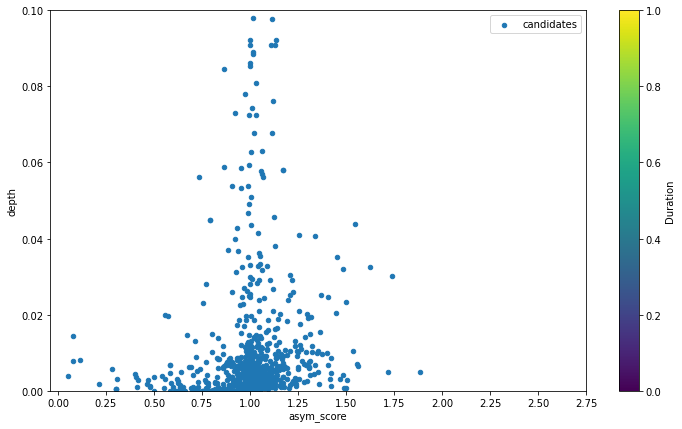

In [43]:
plt.scatter(data_new.asym_score,abs(data_new.depth),s=20,label='candidates',cmap=custom_cmap)
plt.ylim([0,0.1])
plt.xlabel('asym_score')
plt.ylabel('depth')
plt.xticks(np.arange(0,3,0.25))
plt.legend()
plt.colorbar(label='Duration')
plt.show()

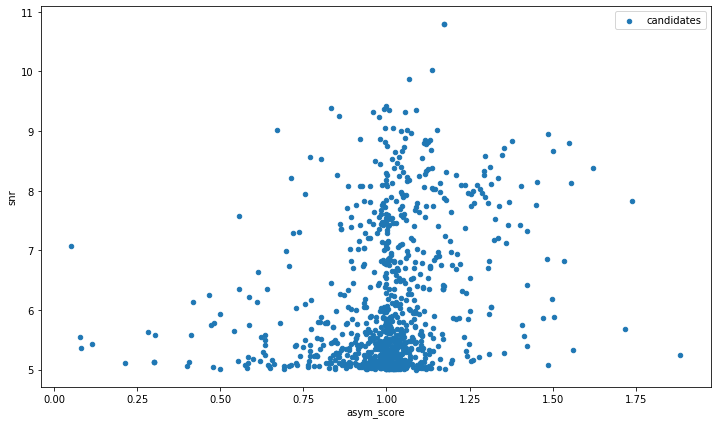

In [44]:
plt.scatter(data_new.asym_score,abs(data_new.snr),s=20,label='candidates',cmap=custom_cmap)
plt.xlabel('asym_score')
plt.ylabel('snr')
plt.legend()
plt.show()

- 0.1 == 10% depth
- 0.01 == 1% depth
- 0.001 == 0.1% depth

### SNR vs depth

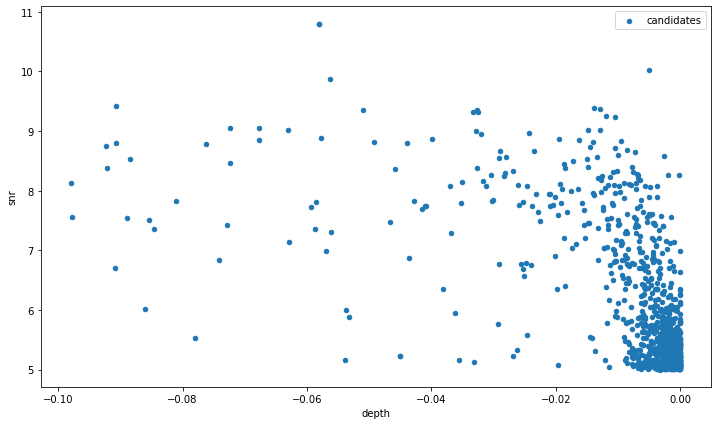

In [45]:
plt.scatter(data_new.depth,abs(data_new.snr),s=20,label='candidates',cmap=custom_cmap)
plt.xlabel('depth')
plt.ylabel('snr')
plt.legend()
plt.show()

## Make SOM Cutouts

In [46]:
os.getcwd()

'/home/astro/phrdhx/automated_exocomet_hunt/scripts'

In [47]:
os.chdir('../')
for i in data_new.path:
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    lc = lc['time','corrected flux','quality','flux error']
    results, _ = processing(lc,lc_info=lc_info,method='median',som_cutouts=True)
    #plt.scatter(data['TIME'],data['PDCSAP_FLUX'],s=2)